In [24]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
Movies = pd.read_csv("C:/Users/Nishi/Desktop/excelR/assignments/Association Rules/my_movies.csv")


In [3]:
Movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df=pd.get_dummies(Movies)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [12]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True,max_len=3)
print(frequent_itemsets.shape)

(342, 2)


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
1493,"(V5_LOTR2, V4_Green Mile)",(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1494,"(V3_Harry Potter1, V4_Green Mile)",(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1495,(V5_LOTR2),"(V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1496,(V3_Harry Potter1),"(V5_LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [7]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR2, V3_Harry Potter1, Harry Potter1, V5_LO...","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(Harry Potter1, LOTR1, LOTR2)","(V4_Green Mile, Sixth Sense, V2_LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V4_Green Mile, V2_LOTR1, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(LOTR1, V2_LOTR1, LOTR2)","(Harry Potter1, Sixth Sense, V4_Green Mile, V5...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(Harry Potter1, V4_Green Mile, V2_LOTR1)","(LOTR2, Sixth Sense, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Harry Potter1, V2_LOTR1, LOTR1)","(LOTR2, Sixth Sense, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V4_Green Mile, V2_LOTR1, LOTR1)","(LOTR2, Sixth Sense, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR2, Sixth Sense, V5_LOTR2)","(Harry Potter1, V4_Green Mile, V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(Harry Potter1, Sixth Sense, V5_LOTR2)","(V4_Green Mile, LOTR1, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(V4_Green Mile, Sixth Sense, V5_LOTR2)","(Harry Potter1, LOTR1, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
rules[rules.lift>1 & (rules['confidence']> 0.8)]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [19]:
lift_association = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(lift_association.shape)
lift_association.head()

(1472, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


In [20]:
 #Eliminating redudancy sets
redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
1,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
2,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
3,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [21]:
unique_rules = redundancy.iloc[::2]
unique_rules.head()
unique_rules.shape

(736, 9)

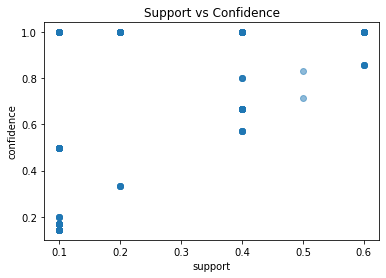

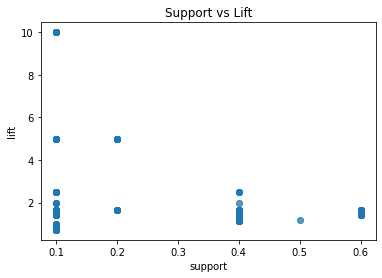

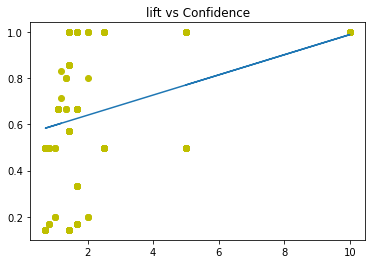

In [25]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))